<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_day_0709/blob/main/2_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [42]:
import pandas as pd
from sklearn.datasets import load_diabetes
data = load_diabetes(scaled=False)
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["y"] = data["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0,178.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0,104.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0,132.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0,220.0


1. 資料筆數: 看問題難度(越簡單就少) -> x多寡

a. 機器學習: 幾千-幾萬  
b. 深度學習: 幾萬-幾十萬筆

In [43]:
# drop
x = df.drop("y", axis=1)
y = df["y"]

In [44]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.25)
# 0.9x 0.1x 0.9y 0.1y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [45]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

[Text(0.5, 0.875, 'bmi <= 27.25\nsquared_error = 5762.287\nsamples = 397\nvalue = 151.219'),
 Text(0.25, 0.625, 's5 <= 4.6\nsquared_error = 3725.53\nsamples = 253\nvalue = 120.281'),
 Text(0.125, 0.375, 's3 <= 55.5\nsquared_error = 2170.191\nsamples = 158\nvalue = 97.133'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 's4 <= 6.78\nsquared_error = 3939.035\nsamples = 95\nvalue = 158.779'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'bp <= 101.5\nsquared_error = 4704.314\nsamples = 144\nvalue = 205.576'),
 Text(0.625, 0.375, 's6 <= 101.5\nsquared_error = 5097.569\nsamples = 80\nvalue = 182.862'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 's5 <= 4.311\nsquared_error = 2761.718\nsamples = 64\nvalue = 233.969'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

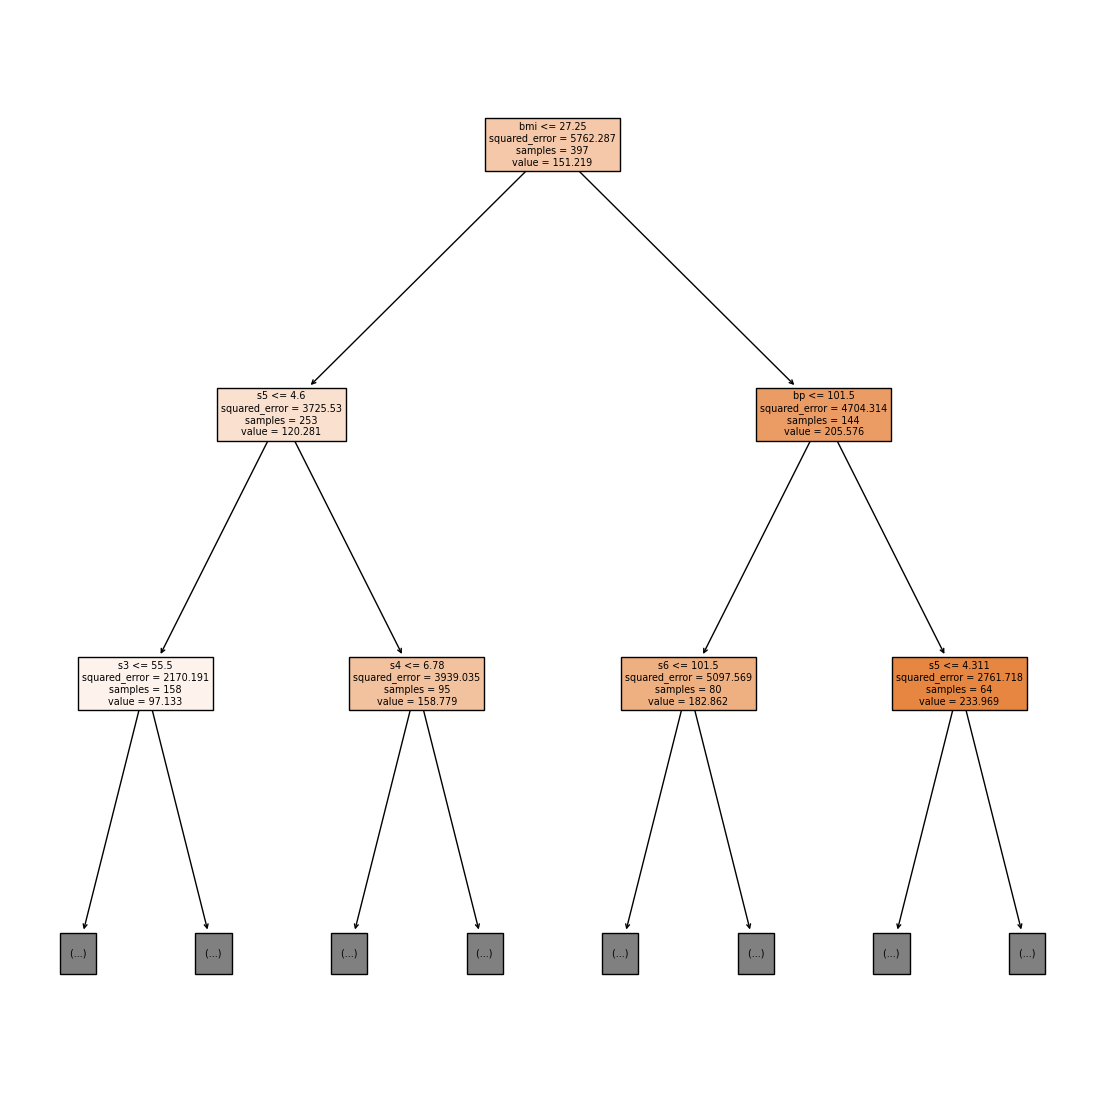

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[14, 14])
plot_tree(reg,
     feature_names=x.columns,
     filled=True,
     max_depth=2)

In [47]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.4266475137567325